In [35]:
# CLUSTERING ANALYSIS

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import warnings

warnings.filterwarnings("ignore")

In [5]:
file_path = '/EastWestAirlines.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [7]:
# To load a specific sheet, specify the name
df = pd.read_excel(file_path, sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
# Data Preprocessing
# Handling missing values (you can also use imputation methods)
df.dropna(inplace=True)

# Remove outliers (example: using Z-score)
z_scores = np.abs((df - df.mean()) / df.std())
df = df[(z_scores < 3).all(axis=1)]

In [9]:
z_scores

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.734908,0.451084,0.186275,0.769482,0.09823,0.062759,0.702698,1.103926,0.328562,0.362123,1.395280,0.766823
1,1.734047,0.539389,0.186275,0.769482,0.09823,0.062759,0.701001,0.999801,0.328562,0.362123,1.379784,0.766823
2,1.733185,0.319991,0.186275,0.769482,0.09823,0.062759,0.539185,0.791550,0.328562,0.362123,1.411744,0.766823
3,1.732324,0.583726,0.186275,0.769482,0.09823,0.062759,0.689200,1.103926,0.328562,0.362123,1.372037,0.766823
4,1.731462,0.239648,0.186275,1.409295,0.09823,0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.724881,0.547010,0.186275,0.769482,0.09823,0.062759,0.356915,0.791550,0.185726,0.098491,1.314955,1.303755
3995,1.725743,0.091454,0.186275,0.769482,0.09823,0.062759,0.669284,0.687425,0.328562,0.362123,1.318829,1.303755
3996,1.726604,0.000043,0.186275,0.683036,0.09823,0.062759,0.343761,0.375049,0.328562,0.362123,1.315439,1.303755
3997,1.727466,0.185584,0.186275,0.769482,0.09823,0.062759,0.689200,1.103926,0.028527,0.098491,1.315924,0.766823


In [10]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# Feature scaling
scaler = StandardScaler()

In [13]:
scaled_data = scaler.fit_transform(df)

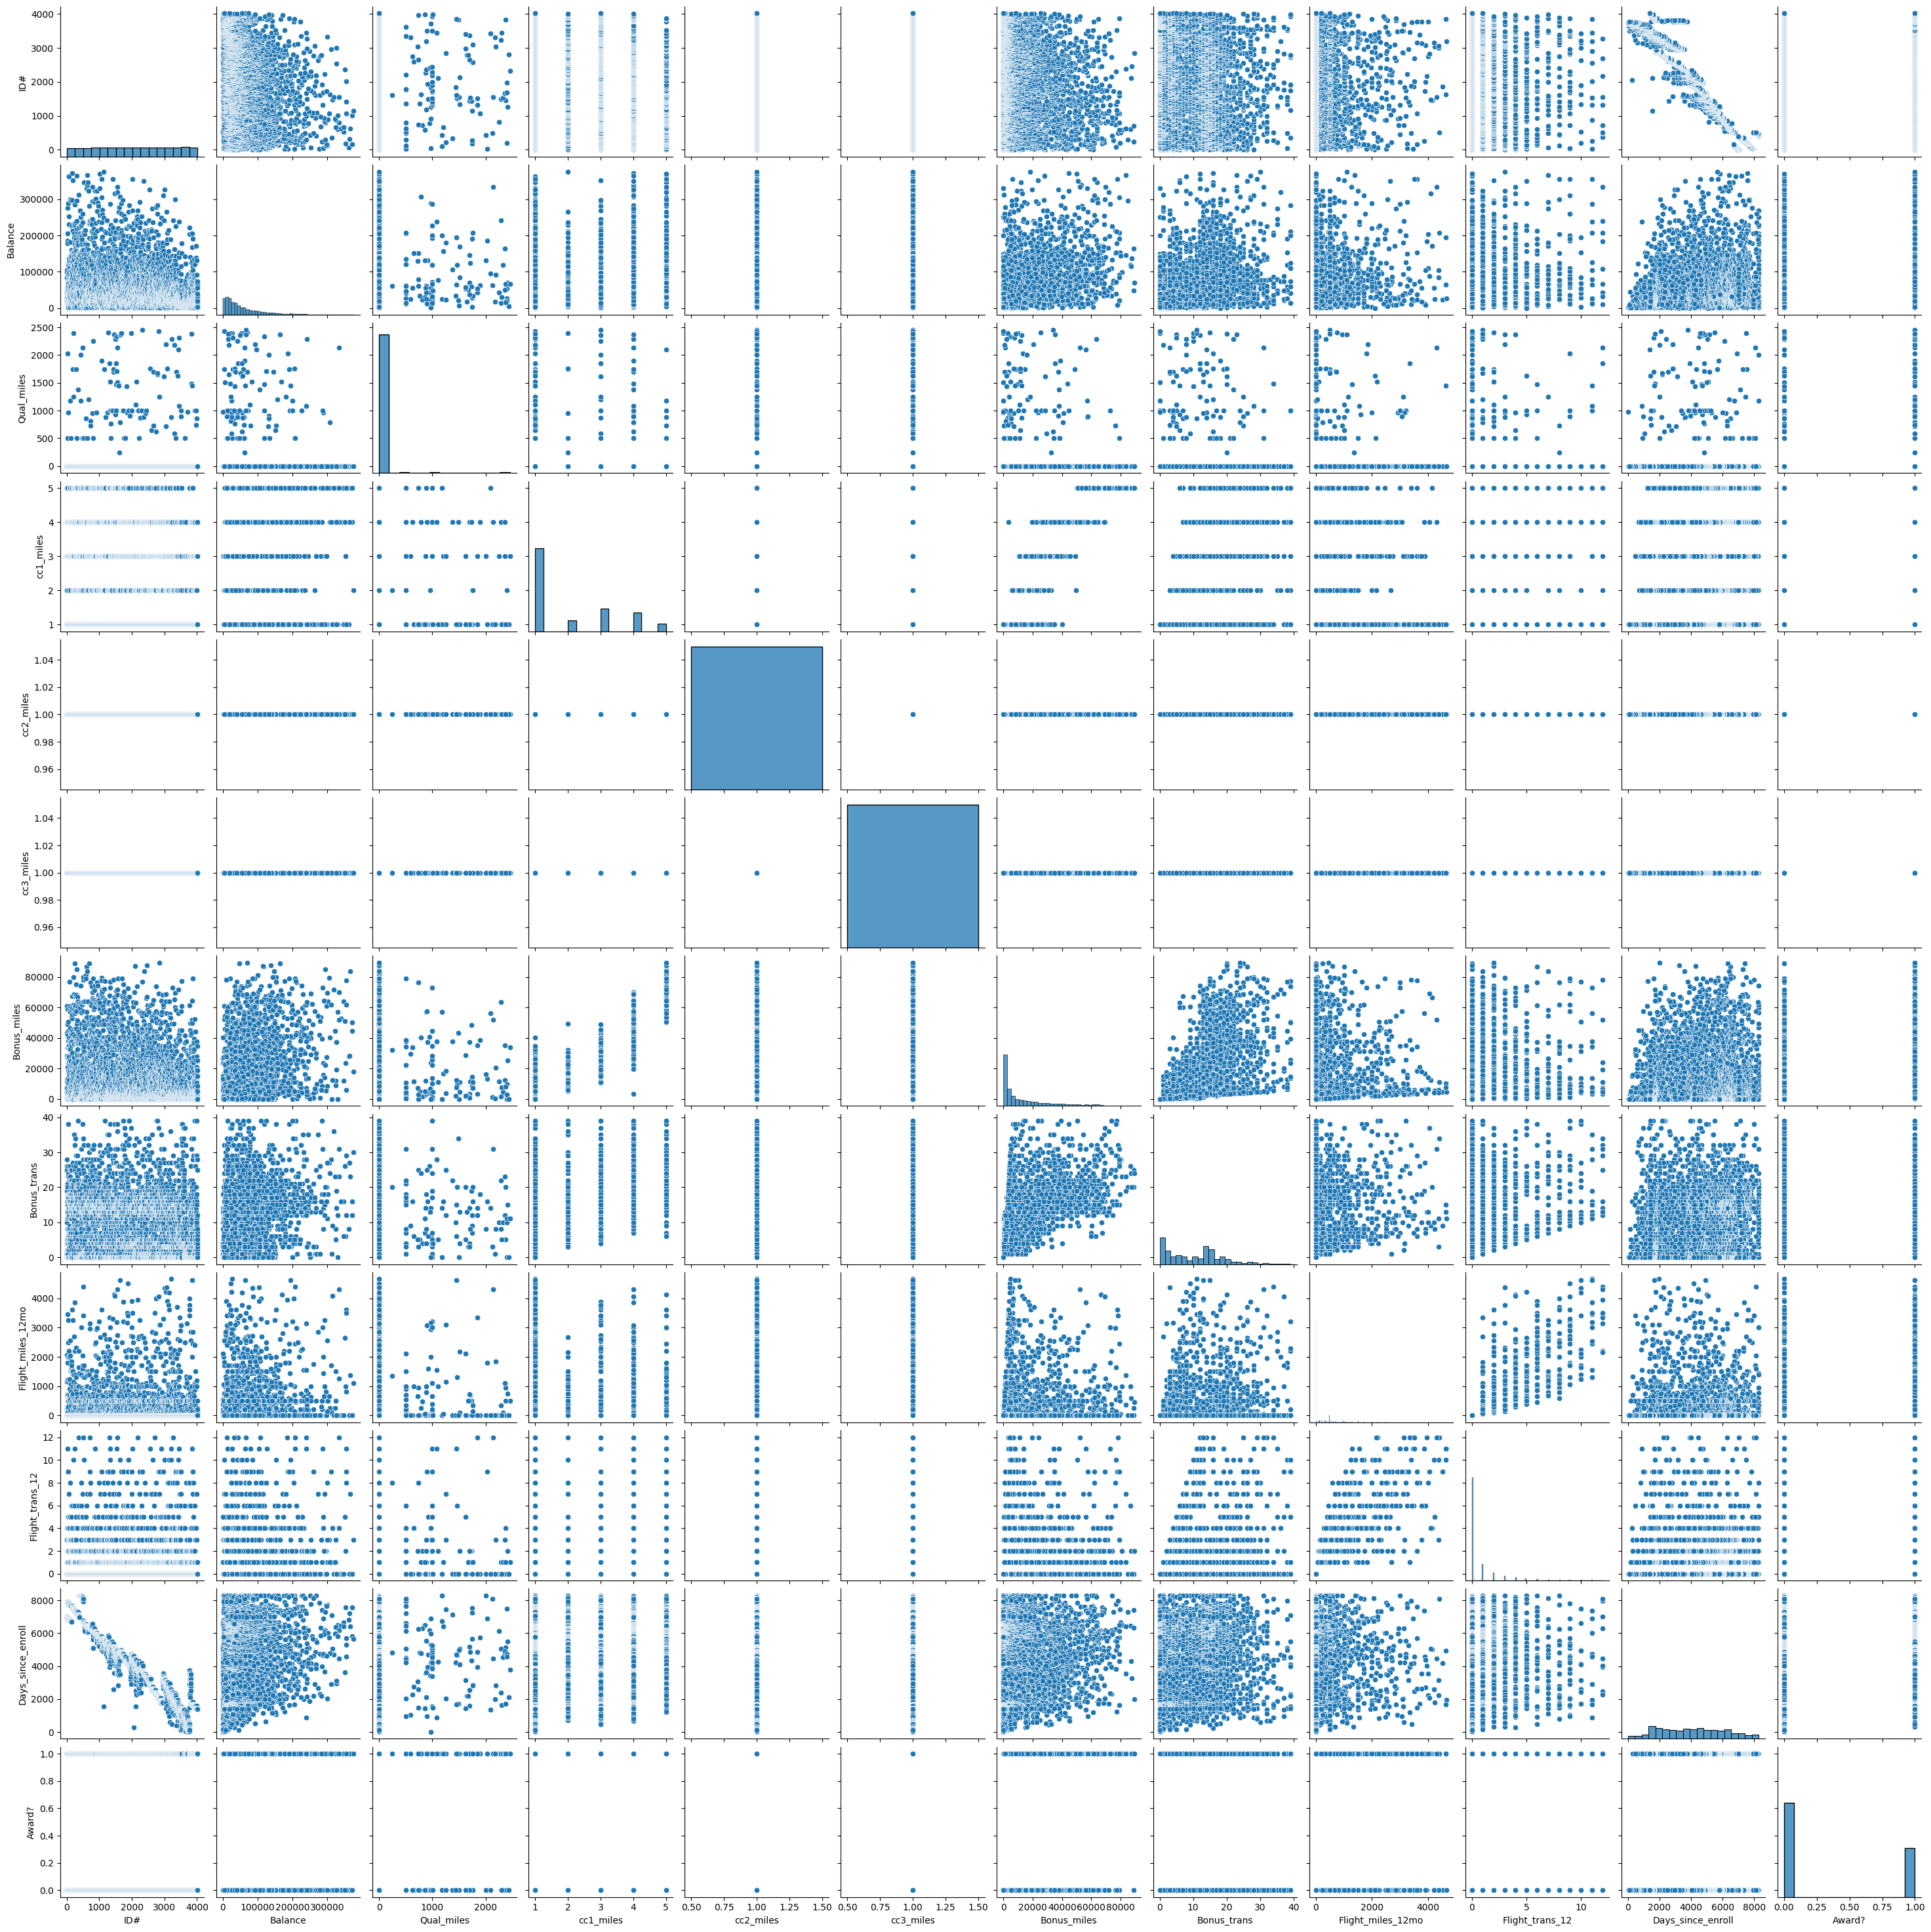

In [14]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

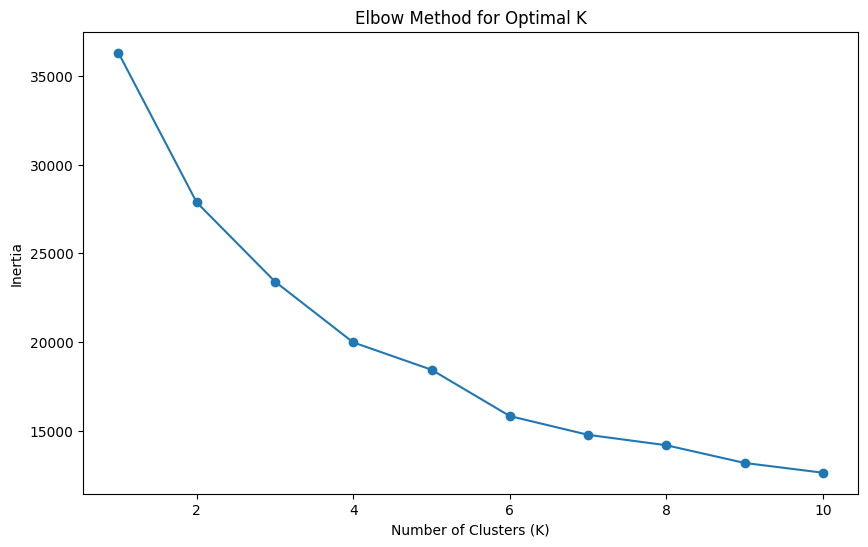

In [15]:
# Elbow Method for K-Means
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
# K-Means Clustering
optimal_k = 3  # Set this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [17]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.2f}')

Silhouette Score for K-Means: 0.22


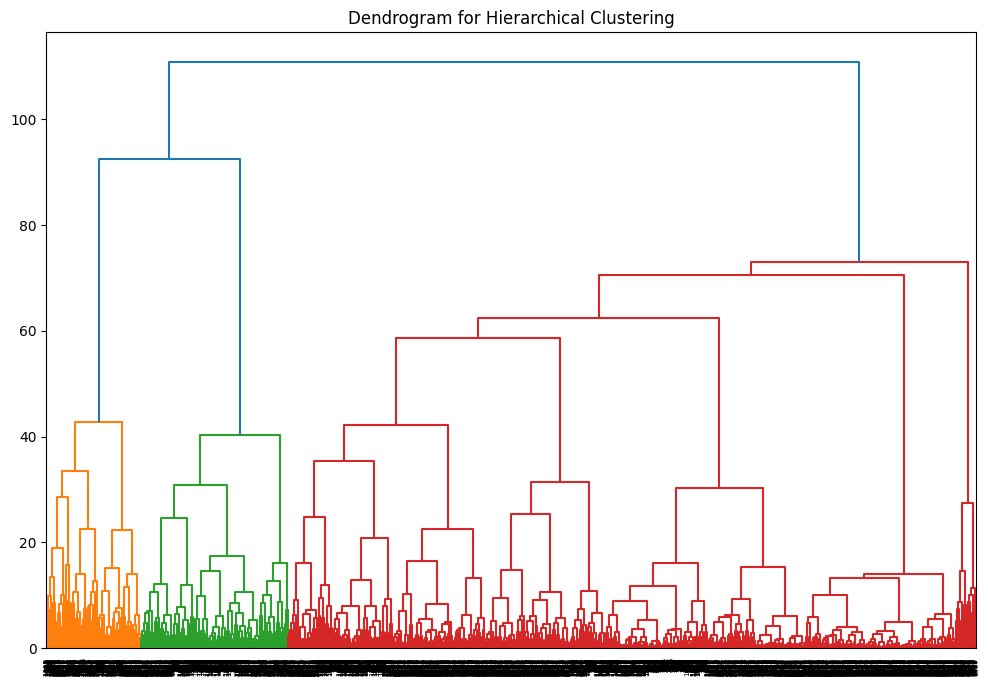

In [21]:
# Hierarchical Clustering
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [28]:
# Hierarchical Clustering Cut-off
# Choose the number of clusters based on dendrogram
hierarchical_labels = fcluster(linked, t=optimal_k, criterion='maxclust')

# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}')


Silhouette Score for Hierarchical Clustering: 0.27


In [31]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [32]:
# Silhouette Score for DBSCAN
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
else:
    silhouette_dbscan = -1  # If all points are in one cluster
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}')

Silhouette Score for DBSCAN: -0.40


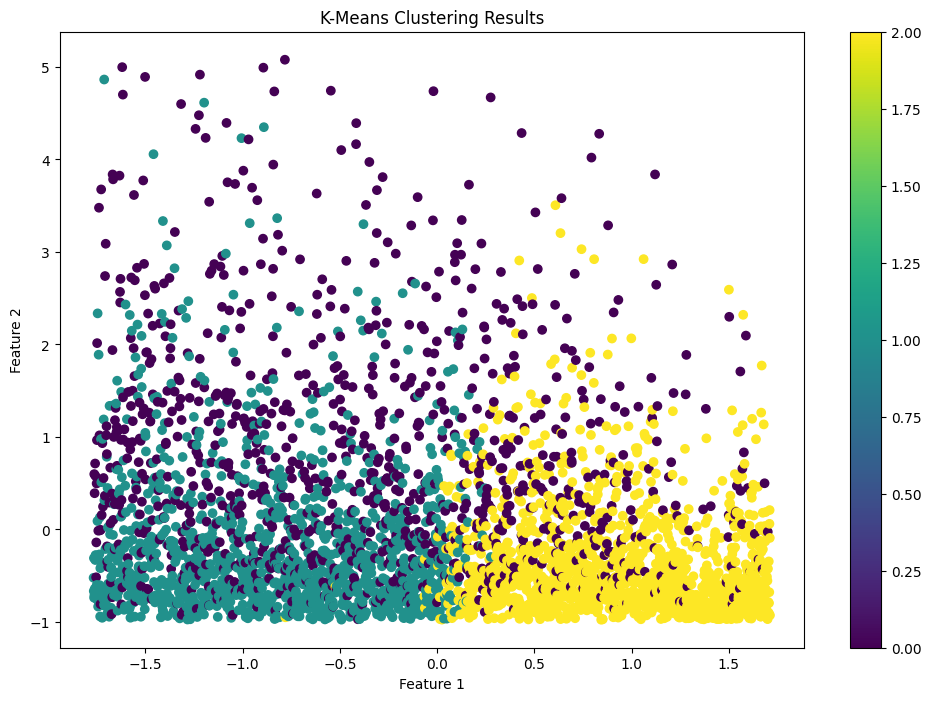

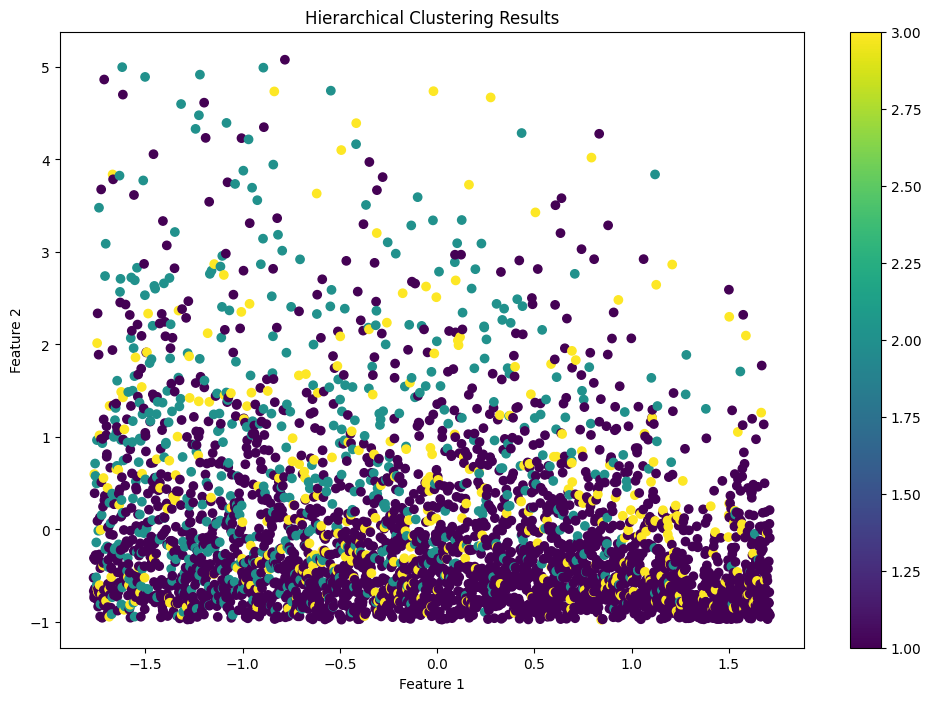

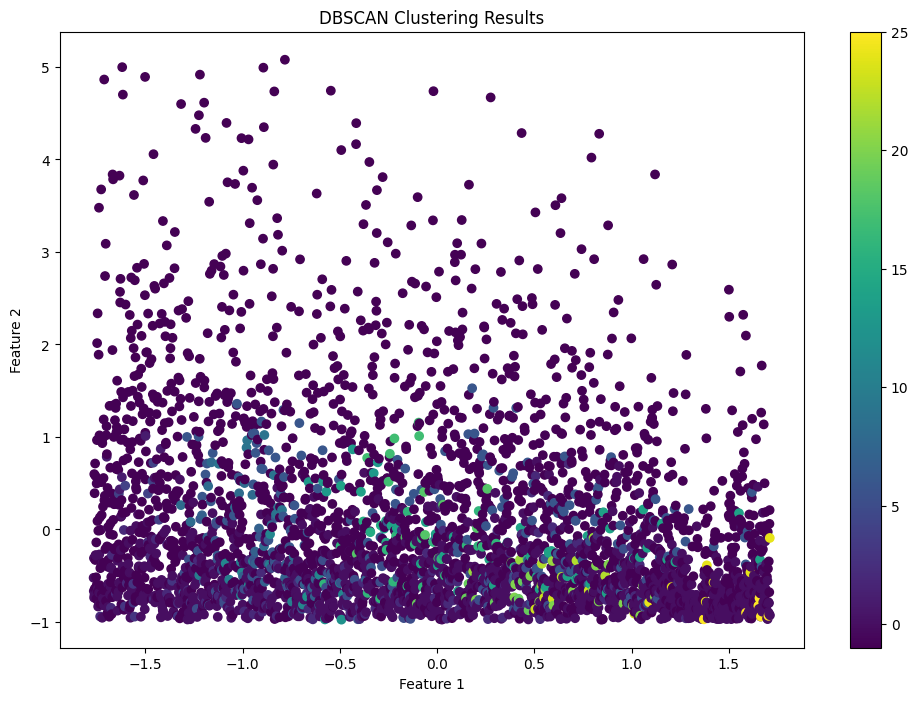

In [33]:
# Visualization of Clustering Results
plt.figure(figsize=(12, 8))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', label='K-Means')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', label='Hierarchical')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', label='DBSCAN')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

In [34]:
# Evaluation and Performance Metrics:
# Cluster Analysis and Interpretation
print("K-Means Cluster Centers:")
print(kmeans.cluster_centers_)

K-Means Cluster Centers:
[[-0.37515298  0.75320698  0.04672684  1.31868257  0.          0.
   1.2853383   0.98272492  0.31551496  0.32163895  0.37913721  0.64989596]
 [-0.80155357 -0.17090963  0.02794057 -0.50772071  0.          0.
  -0.49771037 -0.36399281 -0.09217446 -0.09336347  0.78381868 -0.16475148]
 [ 0.954892   -0.38623343 -0.057107   -0.49689736  0.          0.
  -0.48190087 -0.38266788 -0.14409217 -0.14740496 -0.942461   -0.31839325]]
